In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## MANTRA Data

In [2]:
df_mantra_X = pd.read_csv('../data/MANTRA/transient_lightcurves.csv')
df_mantra_Y = pd.read_csv('../data/MANTRA/transient_labels.csv')

### DataFrame Head/Tail

In [6]:
df_mantra_X

,ID,observation_id,Mag,Magerr,MJD
0,TranID1409030010044114444,0,18.8765,0.166417,53766.089871
1,TranID1409030010044114444,1,20.0519,0.281733,53990.458866
2,TranID1409030010044114444,2,20.2199,0.295764,53996.286004
3,TranID1409030010044114444,3,21.1192,0.495390,54385.205789
4,TranID1409030010044114444,4,19.3289,0.195002,54355.282285
...,...,...,...,...,...
440464,TranID1209190181234125108,451469,18.1952,0.123607,56189.314816
440465,TranID1209190181234125108,451470,18.2097,0.124706,56189.322996
440466,TranID1209190181234125108,451471,18.5116,0.138816,56205.285887
440467,TranID1209190181234125108,451472,18.3150,0.128915,56205.292631


In [7]:
df_mantra_Y

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774
...,...,...
5534,SN,711020040154124879
5535,SN,711020040154110403
5536,SN/TDE,711020040064121985
5537,SN,711011210104109439


#### All Unique Classifications

In [8]:
np.unique(df_mantra_Y['Classification'])

array(['AGB', 'AGN', 'AGN/Blazar', 'AGN/CV', 'AGN/Flare?', 'AGN/SN',
       'AGN/SN?', 'AGN/Var', 'AGN/Var?', 'AGN/nothing?', 'AGN?', 'AMCVn?',
       'Ast', 'Ast/CV?', 'Ast/Flare', 'Ast/Flare?', 'Ast/SN', 'Ast/SN?',
       'Ast/Var', 'Ast/Var?', 'Ast/Var??', 'Ast?', 'Blazar', 'Blazar/AGN',
       'Blazar/SN', 'Blazar?', 'CV', 'CV/AGN', 'CV/AGN?', 'CV/Ast',
       'CV/Ast?', 'CV/Blazar', 'CV/Flare', 'CV/SN', 'CV/SN?', 'CV/Var',
       'CV/Var/Ast', 'CV/Var?', 'CV?', 'Carb', 'Carbon', 'Comet',
       'Comet/Ast?', 'FU', 'Flare', 'Flare/CV', 'Flare/SN', 'Flare/SN?',
       'Flare?', 'GRB', 'HPM', 'HPM/Var?', 'HPM?', 'HPM_GJ3329',
       'LHS_5157', 'LPV', 'Lensing/nothing?', 'Maser', 'Merger/CV?',
       'Mira', 'Nothing/Lensing', 'Nova', 'Nova/CV', 'Nova?', 'O/Ne',
       'OH-IR', 'OH_IR', 'QSO', 'RCorB', 'RRL', 'RRLyrae', 'Red', 'SDSS',
       'SN', 'SN/AGN', 'SN/AGN?', 'SN/Ast', 'SN/Ast?', 'SN/CV', 'SN/CV?',
       'SN/TDE', 'SN/TDE?', 'SN/Var', 'SN/Var?', 'SN/nothing?', 'SN?',
      

In [9]:
def mantra_class_lengths(clss, df_X=df_mantra_X, df_Y=df_mantra_Y):
    """
    
    """
    df_clss = df_Y[df_Y['Classification'] == clss]
    np_clss = df_clss['TransientID'].to_numpy()
    
    output = [];
    for ID in np_clss:
        strID = 'TranID'+str(ID)
        df_size = df_X[df_X['ID'] == strID].shape[0]
        output.append(df_size)

    return np.array(output)

In [10]:
AGN_lengths = mantra_class_lengths('AGN')

In [11]:
SN_lengths = mantra_class_lengths('SN')

In [12]:
CV_lengths = mantra_class_lengths('CV')

In [13]:
Var_lengths = mantra_class_lengths('Var')

In [14]:
HPM_lengths = mantra_class_lengths('HPM')

In [16]:
print('AGN', AGN_lengths.shape[0])
print('SN', SN_lengths.shape[0])
print('CV', CV_lengths.shape[0])
print('HPM', HPM_lengths.shape[0])
print('Var', Var_lengths.shape[0])

AGN 446
SN 1723
CV 988
HPM 640
Var 49


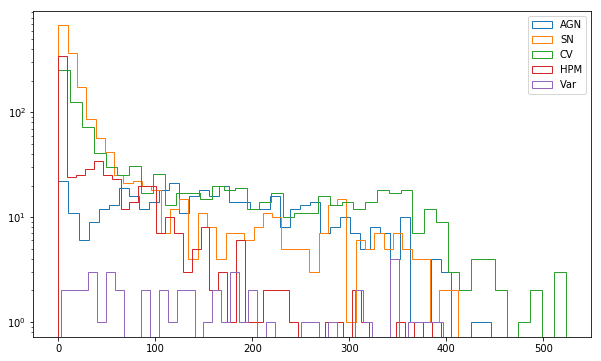

In [15]:
plt.figure(figsize=(10,6))
plt.hist(AGN_lengths, bins=43, histtype='step', label='AGN');
plt.hist(SN_lengths, bins=43, histtype='step', label='SN');
plt.hist(CV_lengths, bins=43, histtype='step', label='CV');
plt.hist(HPM_lengths, bins=43, histtype='step', label='HPM');
plt.hist(Var_lengths, bins=43, histtype='step', label='Var');
plt.yscale('log')
plt.legend();

Can probably leave out the few Var

In [22]:
np.sort(AGN_lengths)[::-1]

array([446, 433, 401, 400, 397, 394, 392, 385, 384, 379, 369, 362, 361,
       358, 358, 357, 357, 356, 355, 355, 353, 347, 347, 344, 344, 340,
       339, 338, 336, 336, 333, 333, 331, 329, 329, 327, 326, 325, 323,
       322, 320, 318, 316, 314, 312, 308, 308, 307, 306, 305, 303, 301,
       300, 298, 297, 297, 296, 295, 294, 293, 292, 291, 290, 289, 286,
       285, 285, 285, 283, 282, 280, 278, 277, 276, 275, 274, 271, 269,
       269, 269, 268, 268, 268, 266, 265, 265, 264, 264, 263, 263, 260,
       259, 257, 257, 256, 256, 255, 254, 254, 253, 253, 252, 252, 250,
       248, 248, 248, 246, 246, 244, 244, 243, 242, 241, 239, 239, 237,
       236, 235, 233, 232, 232, 231, 230, 226, 225, 225, 224, 224, 223,
       223, 223, 222, 222, 221, 221, 221, 221, 219, 219, 217, 217, 217,
       214, 214, 213, 213, 211, 211, 210, 209, 208, 205, 205, 205, 205,
       204, 204, 202, 201, 200, 199, 198, 198, 197, 197, 194, 193, 193,
       192, 192, 191, 191, 190, 189, 188, 188, 187, 186, 185, 18

In [23]:
def extract_mantra_class(clss, threshold=20, df_X=df_mantra_X, df_Y=df_mantra_Y):
    """
    
    """
    df_clss = df_Y[df_Y['Classification'] == clss]
    np_clss = df_clss['TransientID'].to_numpy()
    
    output = [];
    for ID in np_clss:
        strID = 'TranID'+str(ID)
        df_mmm = df_X[df_X['ID'] == strID][['Mag','Magerr','MJD']]
        if df_mmm.shape[0] >= threshold:
            output.append(df_mmm.sort_values('MJD').to_numpy()[:threshold])

    return np.array(output)

In [24]:
classes = ['AGN','SN','CV','HPM','Var']

In [25]:
%%time

ex50_dict = {};

for clas in classes:
    ex50_dict[clas] = extract_mantra_class(clas, threshold=50)

Wall time: 1min 51s


In [27]:
for clas in classes:
    print(clas, ex50_dict[clas].shape)

AGN (389, 50, 3)
SN (351, 50, 3)
CV (491, 50, 3)
HPM (166, 50, 3)
Var (39, 50, 3)


## Export Data

In [50]:
labels.sum()

389

In [104]:
clas_counts = [ex50_dict[clas].shape[0] for clas in classes]
labels = np.array([1]*clas_counts[0] + [0]*sum(clas_counts[1:]))
labels_all = np.array([y for x in [[i]*clas_counts[i] for i in range(len(clas_counts))] for y in x])
labels.shape, labels_all.shape

((1436,), (1436,))

In [72]:
np.sum(np.ma.masked_array(lightcurves[:,0,0], mask=1-labels))

7760.2403

In [74]:
np.sum(ex50_dict['AGN'][:,0,0])

7760.2403

In [53]:
lightcurves = np.concatenate(tuple([ex50_dict[clas] for clas in classes]))
lightcurves.shape

(1436, 50, 3)

In [75]:
np.save('../data/MANTRA/lc_n50', lightcurves)

In [76]:
np.save('../data/MANTRA/labels_n50', labels)

In [105]:
np.save('../data/MANTRA/labels_all_n50', labels_all)

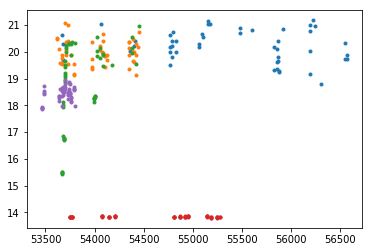

In [106]:
for clas in classes:
    plt.plot(ex50_dict[clas][0,:,2], ex50_dict[clas][0,:,0], '.')

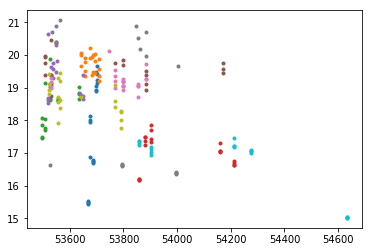

In [170]:
for i in range(10):
    plt.plot(CV_20[i,:,2], CV_20[i,:,0], '.')

In [63]:
X_unique_raw = np.unique(df_mantra_X['ID'])
X_unique = np.array([np.int64(x[6:]) for x in X_unique_raw])
Y_unique = df_mantra_Y['TransientID']
X_unique.shape, Y_unique.shape

((4869,), (5539,))

In [81]:
[sum(X_unique == Y_unique[i]) for i in range(50)]

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1]